## **CSC 375 2.0 Machine Learning II Assignment - 2018**


---


## **Table of Contents**

1. <a href="#\">**Import of Data Sets**</a>

2. **Pre-processing of Data Sets** 
	1. <a href="#\">Detection and Removal of Empty data</a><br>
	2. <a href="#\">Plotting and Analysis of Data</a><br>
	3. <a href="#\">Outlier detection and Removal </a><br>
    4. <a href="#\">Visualizing Outlier removed Data set </a><br>
	

3. **Data preparation for LSTM model 1** 
	
	1. <a href="#\">Array initialization, dropping, Reshaping</a>
	2. <a href="#\">Splitting of Data set for Training and Testing</a>

4. **LSTM Model 1**
	1. <a href="#\">	Model Design</a>
	2. 	<a href="#\">Setting Callbacks</a>
	3. 	<a href="#\">Training and Validation of the Model</a>
	4. 	<a href="#\">Plot of the Loss and Value Loss vs Epoch</a>

5. <a href="#\">**Predicting Values from LSTM 1**</a>

6. **Data preparation for LSTM model 2** (Work in Progress)
7. **LSTM Model 2** (Work in Progress)
8. **Predicting values from LSTM model 2** (Work in Progress)
9. **Analysis and Comparison** (Work in Progress)


Initially the Project was done on **Google Colabs** and the following code was used to mount the Google Drive which includes the required data sets. At the point of submission the code has been commented and the file locations are updated to local directories. 

In [1]:
# Load the Drive helper and mount
#from google.colab import drive

# This will prompt for authorization.
#drive.mount('/content/drive')

## 1. Import of Data Sets

Manually the ARFF data format was converted to CSV for ease of purpose

In [2]:
#importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from io import StringIO
from pandas import read_csv
from matplotlib import pyplot
from pandas import read_csv
from numpy import mean,std, delete, savetxt
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import normalize
from keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
from keras.layers import Input, Dropout, concatenate
from keras.models import Model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import pydot

Using TensorFlow backend.


In [3]:
# load the dataset
data = read_csv('EEG_Eye_State.csv', header=None)
# retrieve data as numpy array
values = data.values

## 2. Pre-processing of Data Sets


### 1. Detection and Removal of Empty data
The provided data set does not contain in NA (Non Applicable) or empty values

### **2. Plotting and Analysis of Data** <br>


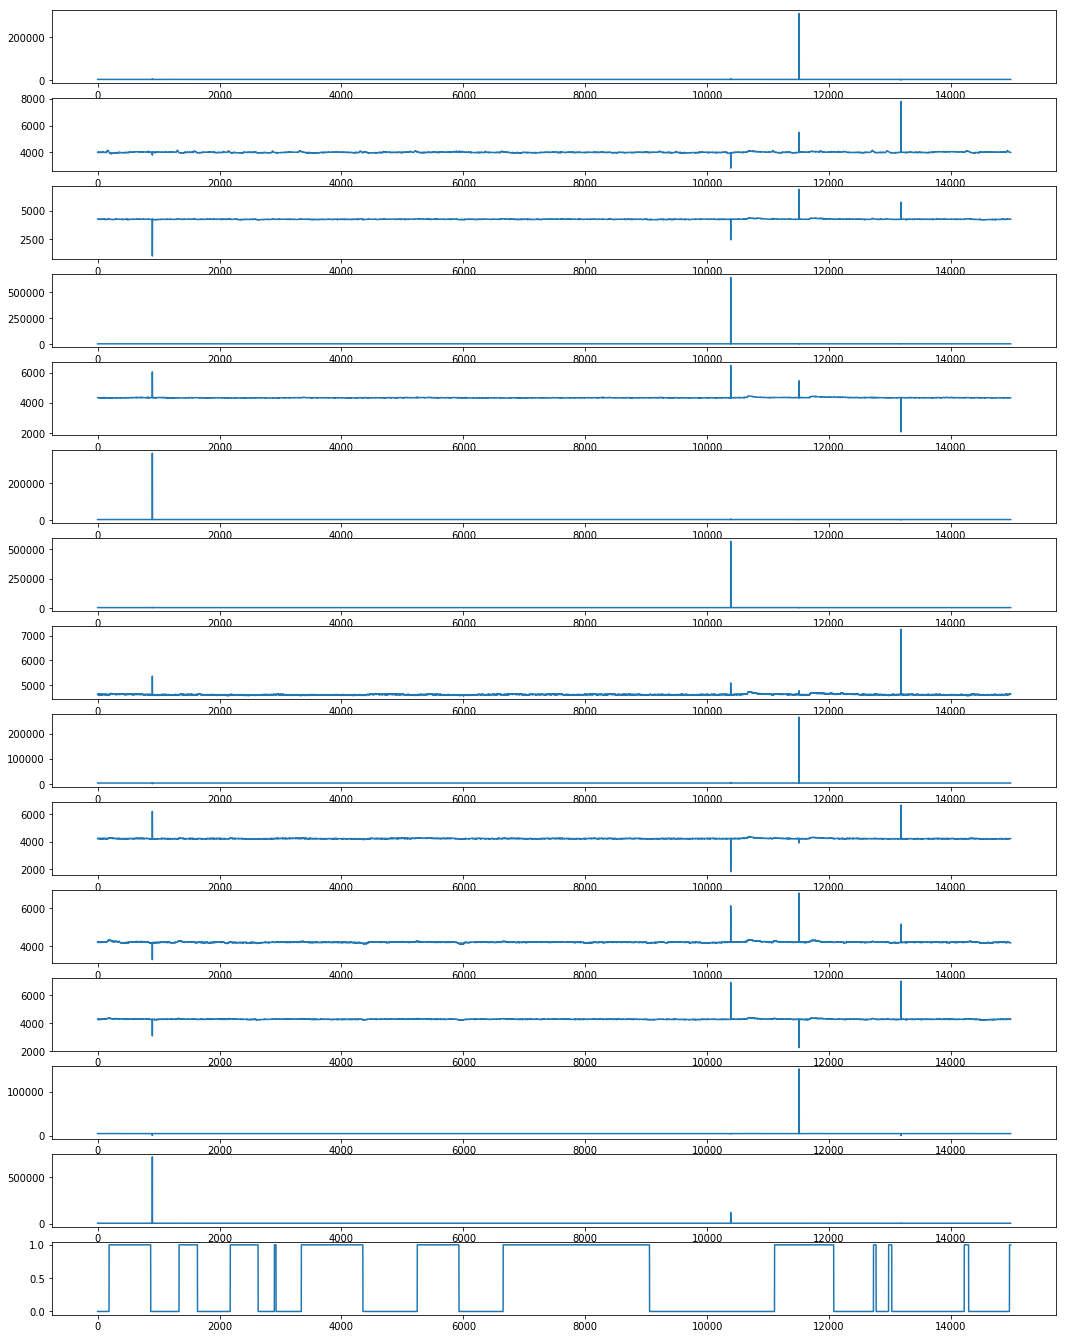

In [4]:
# create a subplot for each time series
pyplot.figure(figsize=(18,24))
for i in range(values.shape[1]):
	pyplot.subplot(values.shape[1], 1, i+1)
	pyplot.plot(values[:, i])
pyplot.show()

### 3. Outlier detection and Removal 

***The sudden spikes shown in the above graph indicates that the Data set contains outliers.***

Detected outlier data points are removed and the removed rows are printed

In [5]:
# remove outliers from the EEG data

# load the dataset.
data = read_csv('EEG_Eye_State.csv', header=None)
values = data.values
# step over each EEG column
for i in range(values.shape[1] - 1):
	# calculate column mean and standard deviation
	data_mean, data_std = mean(values[:,i]), std(values[:,i])
	# define outlier bounds
	cut_off = data_std * 4
	lower, upper = data_mean - cut_off, data_mean + cut_off
	# remove too small
	too_small = [j for j in range(values.shape[0]) if values[j,i] < lower]
	values = delete(values, too_small, 0)
	print('>deleted %d rows' % len(too_small))
	# remove too large
	too_large = [j for j in range(values.shape[0]) if values[j,i] > upper]
	values = delete(values, too_large, 0)
	print('>deleted %d rows' % len(too_large))
# save the results to a new file
savetxt('EEG_Eye_State_no_outliers2.csv', values, delimiter=',')

>deleted 0 rows
>deleted 1 rows
>deleted 2 rows
>deleted 1 rows
>deleted 0 rows
>deleted 142 rows
>deleted 0 rows
>deleted 48 rows
>deleted 0 rows
>deleted 153 rows
>deleted 0 rows
>deleted 43 rows
>deleted 0 rows
>deleted 0 rows
>deleted 0 rows
>deleted 15 rows
>deleted 0 rows
>deleted 5 rows
>deleted 10 rows
>deleted 0 rows
>deleted 21 rows
>deleted 53 rows
>deleted 0 rows
>deleted 12 rows
>deleted 58 rows
>deleted 53 rows
>deleted 0 rows
>deleted 59 rows


### 4. Visualizing Outlier removed Data set 

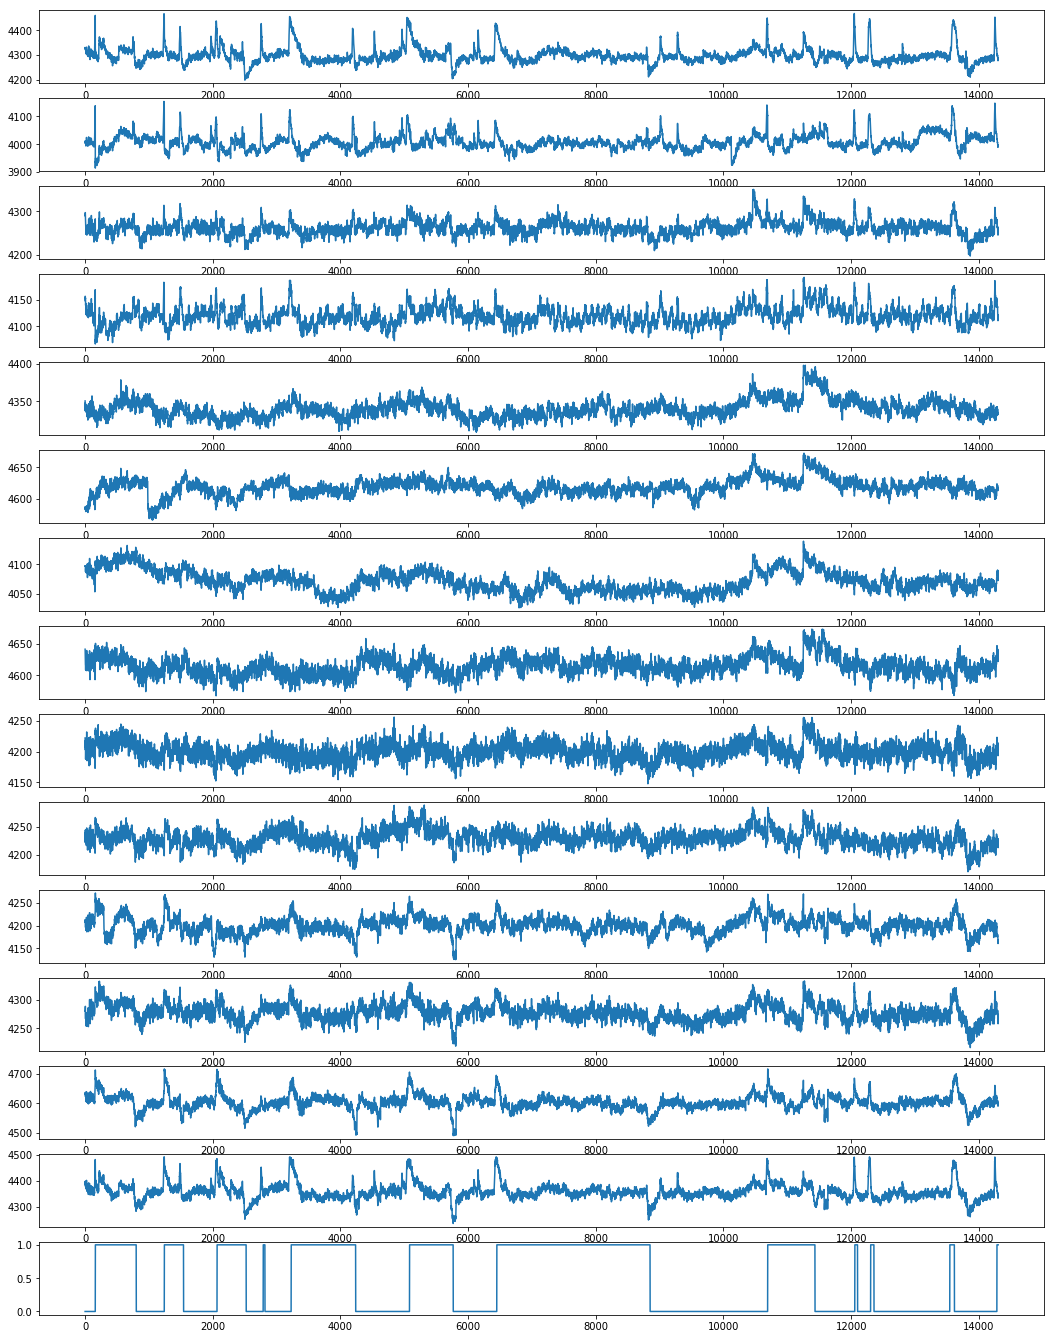

In [6]:
# load the dataset
data = read_csv('EEG_Eye_State_no_outliers2.csv', header=None)
# retrieve data as numpy array
values = data.values
# create a subplot for each time series
pyplot.figure(figsize=(18,24))
for i in range(values.shape[1]):
	pyplot.subplot(values.shape[1], 1, i+1)
	pyplot.plot(values[:, i])
pyplot.show()

## 3. Data preparation for LSTM model 1

### 1. Array initialization, dropping, Reshaping

In [7]:
#Dropping the EyeDetection label value from the initial data set and assign a a seperate variable to hold the data of the features 
data_set = np.delete(values,14,1)

In [8]:
#Creation of a List to to store the Target values
target = []

In [9]:
#Target labels are appended to the Target list
for i in range(len(values)):
    target.append(values[i][14])

In [10]:
#Target is converted to a Numpy array
target = np.array(target)
target.shape

(14304,)

In [11]:
#Reshaped data set to a 3D which is required for LSTM
data_set_reshaped = data_set.reshape(len(values),14,1)
data_set_reshaped

array([[[4329.23],
        [4009.23],
        [4289.23],
        ...,
        [4280.51],
        [4635.9 ],
        [4393.85]],

       [[4324.62],
        [4004.62],
        [4293.85],
        ...,
        [4279.49],
        [4632.82],
        [4384.1 ]],

       [[4327.69],
        [4006.67],
        [4295.38],
        ...,
        [4282.05],
        [4628.72],
        [4389.23]],

       ...,

       [[4277.44],
        [3990.77],
        [4246.67],
        ...,
        [4257.95],
        [4591.79],
        [4339.49]],

       [[4284.62],
        [3991.79],
        [4251.28],
        ...,
        [4267.18],
        [4596.41],
        [4350.77]],

       [[4287.69],
        [3997.44],
        [4260.  ],
        ...,
        [4274.36],
        [4597.95],
        [4350.77]]])

In [12]:
#Reshape target set to 3D a required for LSTM
target = target.reshape(len(values),1,1)
target.shape

(14304, 1, 1)

### 2. Splitting of Data set for Training and Testing

In [13]:
#splitting data 80% Train, 20% Test
testPerc = 0.2
eeg_train,eeg_test,eye_train,eye_test = train_test_split(data_set_reshaped,target,test_size=testPerc,random_state=4)

#eeg_train,eye_val,eye_train,eye_val = train_test_split(eeg_train,eye_train,test_size=testPerc,random_state=4)

In [14]:
#There data will be used in the seperate Input layers for Eye and EEG in the next section
eye_train_2 = eye_train.reshape(11443,1)
eye_test_2 = eye_test.reshape(2861,1)

## 4. LSTM Model 1

### 1. Model Design
Using the Keras API functions following LSTM Model was Designed.

In [15]:
#Model for Eye Data Part

#Eye data input layer
inputsEye = Input(shape=(1,1))
#LSTM Layer
lstmLayer = LSTM(1,input_shape=(eye_train.shape[1], eye_train.shape[2]))(inputsEye)
#Drop out layer
eyeDrop = Dropout(0.8)(lstmLayer)
#Dense layer
denseEyeLayer = Dense(1, activation='tanh')(lstmLayer)


#EEG Data Part

#EEG data input layer
inputsEEG = Input(shape=(14,1))
#LSTM Layer
lstmEEGLayer = LSTM(1,input_shape=(eeg_train.shape[1], eeg_train.shape[2]))(inputsEEG)
#Drop out layer
eegDrop = Dropout(0.8)(lstmEEGLayer)
#Dense layer
denseEEGLayer = Dense(1, activation='tanh')(lstmEEGLayer)


#Concatenation of the Eye and EEG models
concIn = concatenate([denseEyeLayer,denseEEGLayer],axis=1)
print(concIn.shape)

#Additional Dense layer
output = Dense(1,input_shape=(None,2),activation='sigmoid')(concIn)
print(output.shape)

#Finally creation of the Model
model = Model(inputs=[inputsEye,inputsEEG],outputs=[output])


(?, 2)
(?, 1)


In [16]:
#Viewing the Model Summary
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 1)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 14, 1)        0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 1)            12          input_1[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 1)            12          input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (D

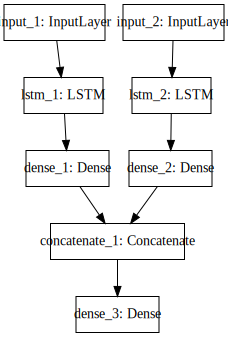

In [17]:
#Preview of the Network 
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [18]:
#Compilation of the Model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])


### 2. Setting CallBacks

In [19]:
#CallBack parameters for Early Stopping and Reduce Learning Rate
callbacks = [
    EarlyStopping(monitor='val_loss', min_delta=0,patience=5, verbose=1,mode='max'),
    ReduceLROnPlateau(factor=0.01, patience=8, min_lr=0.00001, verbose=1),
    #ModelCheckpoint('model-eye-state.h5', verbose=1, save_best_only=True, save_weights_only=True),
]

### 3. Training and Validation of the Model

In [20]:
results = model.fit([eye_train, eeg_train], [eye_train_2], validation_data=([eye_test,eeg_test],eye_test_2),
          epochs=50, batch_size=72,callbacks=callbacks)

Train on 11443 samples, validate on 2861 samples
Epoch 1/50
11443/11443 [==============================] - 16s 1ms/step - loss: 0.4839 - acc: 0.6753 - val_loss: 0.4721 - val_acc: 0.5414
Epoch 2/50
11443/11443 [==============================] - 12s 1ms/step - loss: 0.4520 - acc: 0.5511 - val_loss: 0.4311 - val_acc: 0.5414
Epoch 3/50
11443/11443 [==============================] - 12s 1ms/step - loss: 0.3996 - acc: 0.6351 - val_loss: 0.3688 - val_acc: 1.0000
Epoch 4/50
11443/11443 [==============================] - 13s 1ms/step - loss: 0.3315 - acc: 1.0000 - val_loss: 0.2977 - val_acc: 1.0000
Epoch 5/50
11443/11443 [==============================] - 13s 1ms/step - loss: 0.2656 - acc: 1.0000 - val_loss: 0.2382 - val_acc: 1.0000
Epoch 6/50
11443/11443 [==============================] - 12s 1ms/step - loss: 0.2150 - acc: 1.0000 - val_loss: 0.1962 - val_acc: 1.0000
Epoch 00006: early stopping


### 5. Plot of the Loss and Value Loss vs Epoch

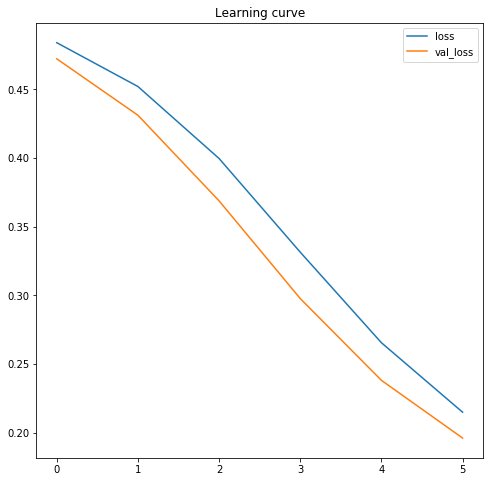

In [21]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
#plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
#plt.xlabel("Epochs")
#plt.ylabel("log_loss")
plt.legend()

## 5. Predicting Values from LSTM 1

In [22]:
#Input EEG Value
eeg_in = [4445.13,4017.95,4292.82,4121.54,4325.13,4591.79,4077.44,4628.72,4229.23,4273.33,4316.92,4350.77,4810.26,4552.82]
#Input Eye value
eye_in = [1]
#Converting the EEG and Eye values to appropriate shapes
eeg_in = np.array(eeg_in)
eeg_in = eeg_in.reshape(1,14,1)

eye_in = np.array(eye_in)
eye_in = eye_in.reshape(1,1,1)

In [34]:
#Predicting the Model
y_pred = model.predict([eye_in,eeg_in])

In [35]:
#Output value
y_pred

array([[0.76968634]], dtype=float32)

In [36]:
#Final output rounded to nearest of the Prediction
final_output = round(y_pred[0][0])
print(final_output)


1.0


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
confusion_matrix(eye_val, y_pred, labels=None, sample_weight=None)